# Gradient Descent

----
Gradient descent (GD) is a common method to minimize the risk function, loss function, and is the most common optimization algorithm for neural network model training. For deep learning models, gradient descent algorithm is basically used for optimization training.


In [18]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import random
import datetime

# Gradient descent apply to Linear regression

-----
- Mathematical formulation
- Loss function
\begin{aligned}J(\theta) = \frac{1}{2m}\sum_{i=1}^{n} (h_\theta(x_i) - y_i)^2\end{aligned}
- Gradient descent
\begin{aligned}\theta_j =\theta_j- \alpha\frac{1}{m}\sum_{i=1}^{n} (h_\theta(x_i) - y_i)^2x_i^j\end{aligned}

In [19]:
class GradientDescentLinearRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate, self.iterations = learning_rate, iterations
    
    def fit(self, X, y):
        b = 0
        m = 5
        n = X.shape[0]
        for _ in range(self.iterations):
            b_gradient = -2 * np.sum(y - m*X + b) / n
            m_gradient = -2 * np.sum(X*(y - (m*X + b))) / n
            b = b + (self.learning_rate * b_gradient)
            m = m - (self.learning_rate * m_gradient)
        self.m, self.b = m, b
        
    def predict(self, X):
        return self.m*X + self.b

# Generate random data

In [20]:
np.random.seed(42)
X = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.5)
y = np.array(sorted(list(range(5))*20)) + np.random.normal(size=100, scale=0.25)


# Result of GDLR

Text(0.5, 1.0, 'Gradient Descent')

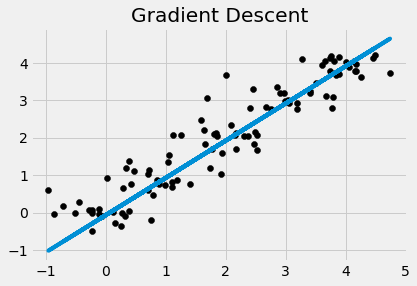

In [21]:
clf = GradientDescentLinearRegression()
clf.fit(X, y)
plt.style.use('fivethirtyeight')
plt.scatter(X, y, color='black')
plt.plot(X, clf.predict(X))
plt.gca().set_title("Gradient Descent")

#  Batch Gradient Descent
-----
In each update with all samples, it is important to note that in gradient descent, for the update of $\theta_i$, all samples contribute, that is, participate in adjusting $\theta$. Its calculation yields a standard gradient, and for the optimization problem, convex problem, a global optimum can certainly be reached as well. Thus, the magnitude of one update is theoretically larger. If there are not many samples, of course, the convergence speed will be faster. However, in many cases, the samples are large and it takes a long time to update once, so this method is not suitable.



In [22]:
def bgd(samples, y, step_size=0.01, max_iteration_count=10000):
    sample_num, dimension = samples.shape
    w = np.ones((dimension,1), dtype=np.float32)
    loss_collection = []
    loss = 1
    iteration_count = 0
    #Iterate when the loss is greater than the threshold and the number of 
    #iterations is less than the maximum number of iterations
    while loss > 0.001 and iteration_count < max_iteration_count:
        loss = 0
        gradient = np.zeros((dimension,1), dtype=np.float32)
        for i in range(sample_num):
            predict_y = np.dot(w.T, samples[i])
            for j in range(dimension):
                gradient[j] += (predict_y - y[i]) * samples[i][j]
        #  Update weights
        for j in range(dimension):
            w[j] -= step_size * gradient[j]
        #  Calculate the current loss value
        for i in range(sample_num):
            predict_y = np.dot(w.T, samples[i])
            loss += np.power((predict_y - y[i]), 2)
        #  Store the loss in a chain table for subsequent drawing
        loss_collection.append(loss)
        iteration_count += 1
    return w,loss_collection



# Stochastic Gradient Descent
-----
stochastic is to say we use an example of the sample to approximate all my samples, to adjust $\theta$, and thus stochastic gradient descent is will bring certain problems, because the calculation is not the exact one gradient, for optimization problems, convex problems, although not each iteration to get the loss function are toward the global optimal direction, but the large overall direction is often in the global optimal solution. However, the overall direction is toward the global optimum, and the final result is often near the global optimum. However, compared to the batch gradient, this method is faster and converges faster, although it is not globally optimal, it is often acceptable.



In [23]:
def sgd(samples, y, step_size=0.001, max_iteration_count=10000):
    sample_num, dimension = samples.shape
    w = np.ones((dimension,1), dtype=np.float32)
    loss_collection = []
    loss = 1
    iteration_count = 0
    while loss > 0.001 and iteration_count < max_iteration_count:
        loss = 0
        gradient = np.zeros((dimension,1), dtype=np.float32)
        #  Unlike BGD, here a random sample is taken for weight update
        sample_index = random.randint(0, sample_num-1)
        predict_y = np.dot(w.T, samples[sample_index])
        for j in range(dimension):
            gradient[j] += (predict_y - y[sample_index]) * samples[sample_index][j]
            w[j] -= step_size * gradient[j]

        for i in range(sample_num):
            predict_y = np.dot(w.T, samples[i])
            loss += np.power((predict_y - y[i]), 2)

        loss_collection.append(loss)
        iteration_count += 1
    return w,loss_collection


# Compare BGD with SGD

bgd_w: [[2.8636951]
 [4.5708055]]
bgd predict_y: [[12.00530624 28.58141804 18.88928127 20.59639168]]
bgd_time: 0.076152 s
sgd_w: [[2.9542563]
 [4.538947 ]]
sgd predict_y: [[12.03215051 28.60324812 19.31022859 20.8949194 ]]
sgd_time: 0.040569 s


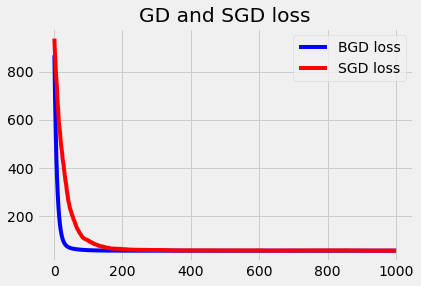

In [24]:

if __name__ == '__main__':
    samples = np.array([[1,2,5,4],
                        [2,5,1,2]]).T
    y = np.array([19,26,19,20]).reshape((4,1))
    #  current time
    time = datetime.datetime.now();
    bgd_w,bgd_loss_collection = bgd(samples, y, 0.001, 1000)
    #  time after BGD calculation
    time_afterBGD = datetime.datetime.now();
    sgd_w,sgd_loss_collection = sgd(samples, y, 0.001, 1000)
    #  Time after SGD
    time_afterSGD = datetime.datetime.now();
    # Draw the loss direction diagram
    epochs = range(1, len(bgd_loss_collection)+1)
    plt.plot(epochs, bgd_loss_collection, 'b', label='BGD loss')
    plt.plot(epochs, sgd_loss_collection, 'r', label='SGD loss')
    plt.title('GD and SGD loss')
    plt.legend()
    plt.savefig('GD and SGD loss.png',dpi = 300)
    #  Print out the relevant results
    print('bgd_w:',bgd_w)
    print('bgd predict_y:',np.dot(bgd_w.T, samples.T))
    print('bgd_time:',(time_afterBGD-time).total_seconds(),'s')
    print('sgd_w:',sgd_w)
    print('sgd predict_y:',np.dot(sgd_w.T, samples.T))
    print('sgd_time:',(time_afterSGD-time_afterBGD).total_seconds(),'s')

# Conclusion
-----
We can see that BGD algorithm calculate faster than SGD, it's different from what I expected. It may because the sample size is small. When sample size get bigger the SGD could be faster.